# Data Science Project Based on Australian Vehicle Prices Dataset

Jane Citizen 40987654

### *I will comment (#) the code which is incorrect to add the correct code for the statements*

## Dataset Description:

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

* Brand: Name of the car manufacturer
* Year: Year of manufacture or release
* Model: Name or code of the car model
* Car/Suv: Type of the car (car or suv)
* Title: Title or description of the car
* UsedOrNew: Condition of the car (used or new)
* Transmission: Type of transmission (manual or automatic)
* Engine: Engine capacity or power (in litres or kilowatts)
* DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
* FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
* FuelConsumption: Fuel consumption rate (in litres per 100 km)
* Kilometres: Distance travelled by the car (in kilometres)
* ColourExtInt: Colour of the car (exterior and interior)
* Location: Location of the car (city and state)
* CylindersinEngine: Number of cylinders in the engine
* B odyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
* Doors: Number of doors in the car
* Seats: Number of seats in the car
* Price: Price of the car (in Australian dollars)


## AIM:

We would like to predict the price of the car base on the cars' features (e.g. manufacture year, transmission, engine). Meanwhile, we we like to compare the performance of different regresion models.


## Import Libraries

Here we import all the libraries we need.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# this is used for random seed
student_id = 40987654

## Data Loading

We load in the CSV file and print the table head of the source data to check what kind of feature data has been included.

In [5]:
file_csv = "australian_vehicle_prices.csv"
raw = pd.read_csv(file_csv)
print("data shape is : ", raw.shape)
raw.head()

data shape is :  (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


It shows that the raw dataset has 16,734 samples, each sample contains 19 values.


We drop the column **Title**, **ColourExtInt** and **Model** because they are irrelevant. The column **Car/Suv** are also dropped because it's overlapping with **BodyType**. Then we check the shape.

In [8]:
data = raw.drop(columns=['Title', 'Car/Suv', 'ColourExtInt', 'Model'])
print(data.shape)

(16734, 15)


We would like to do a further check to see the possible values of each column.

In [10]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'Brand':
['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' nan 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Ineos' 'Caterham' 'Hino'
 'International' 'Lotus' 'Polestar' 'Datsun' 'Packard']


Unique values for column 'Year':
[2022. 2011. 2004. 2017. 2000. 2013. 2014. 2009. 2018. 2015. 2016. 2012.
 2023. 2005. 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2020. 1999. 2002.
 1995. 1997. 1993. 2001. 1998. 1985. 1992.   nan 1986. 1996. 1994. 1989.
 1990. 1981. 1991. 19

As we can see, there are possible '-' in column **Transmission**, **FuelType**, and 'POA' in column **Price**. They are not *NaN* but are meaningless and should be converted to *NaN*.
Meanwhile, one of the value in **Location** is *Warrenheip, AU-VIC*.
As the format is < *Suburb, State* >, we are going to consolidate *AU-VIC* and *VIC* to *VIC*.

In [12]:
data.replace(['-','POA'],np.NAN,inplace=True)

data['Location'] = data['Location'].str.replace('AU-VIC', 'VIC')

Meanwhile, some of the columns are containing strings but could be presented by numerical data.

For example, the unit for **FuelConsumption** is *L/100km*, thus we could only keep the numerical data within the string.

The column **Location** are too specific and won't help with the project. We keep the States only.

The column **Engine** are partially overlapping with **CylindersinEngine**, we keep the displacement in new column **Displacement** and discard the **Engine**.

In [14]:
# perform string manipulation then convert to numeric value
data['FuelConsumption'] = data['FuelConsumption'].str.split('/').str[0].str.split().str[0]
data['FuelConsumption'] = pd.to_numeric(data['FuelConsumption'], errors='coerce') # we use 'coerce' to keep NaN

# perform string manipulation
data['Location'] = data['Location'].str.split(',').str[1].str.strip()

# perform string manipulation then convert to numeric value
data['Displacement'] = data['Engine'].str.split(',').str[1].str.split().str[0]
data['Displacement'] = pd.to_numeric(data['Displacement'], errors='coerce')
data.drop(columns=['Engine'], inplace=True)

# perform string manipulation then convert to numeric value
data['CylindersinEngine'] = data['CylindersinEngine'].str.split().str[0]
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Doors'] = data['Doors'].str.split().str[0]
data['Doors'] = pd.to_numeric(data['Doors'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Seats'] = data['Seats'].str.split().str[0]
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')

# convert to numeric value
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# convert to numeric value
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')


We check the shape and the percentage of missing data.

In [16]:
print("Data shape:", data.shape)
print("Percentage of data missing from each column")
data.isnull().sum()/len(data)*100

Data shape: (16734, 15)
Percentage of data missing from each column


Brand                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Transmission          1.505916
DriveType             0.005976
FuelType              3.812597
FuelConsumption      10.147006
Kilometres            3.537708
Location              2.689136
CylindersinEngine    10.009561
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.316720
Displacement         10.654954
dtype: float64

We would like to drop the null values. However, column **FuelConsumption**, **CylindersinEngine**, **Doors**, **Seats** and **Displacement** have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data, we fill them with the average value of that column respectively.

In [18]:
# data.dropna(inplace=True)
# print("Data shape after processing the missing value:", data.shape)

#### Error1: In the previous code, he is dropping missing values when he should replace them with the average of the column. First I will check if we should replace them with the average or if there is other better measure.

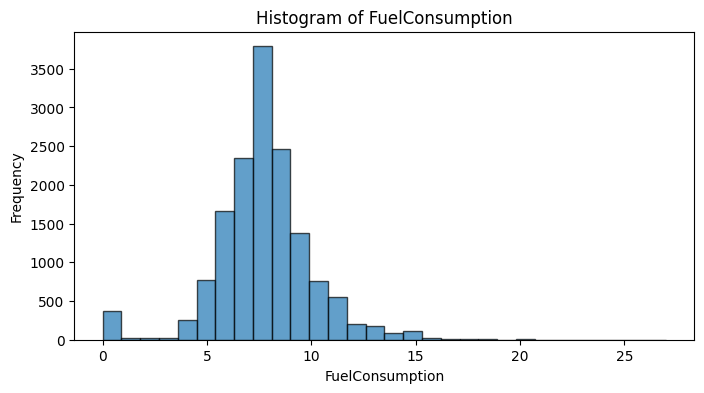

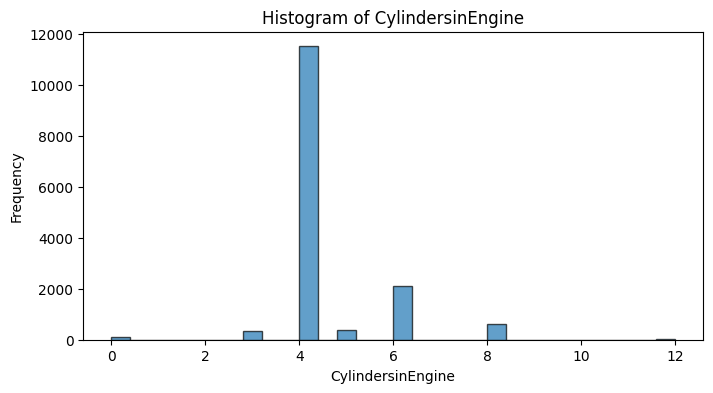

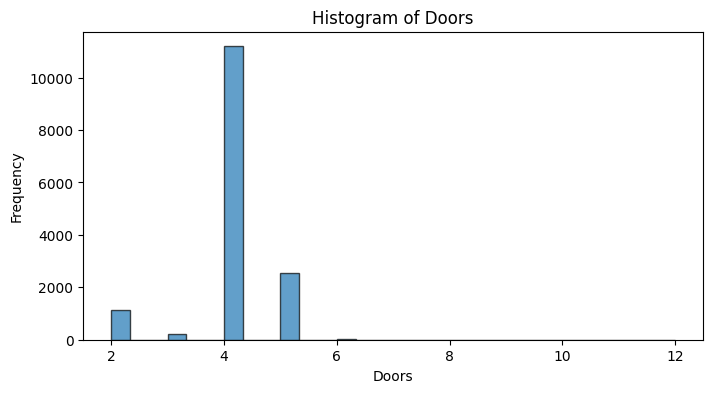

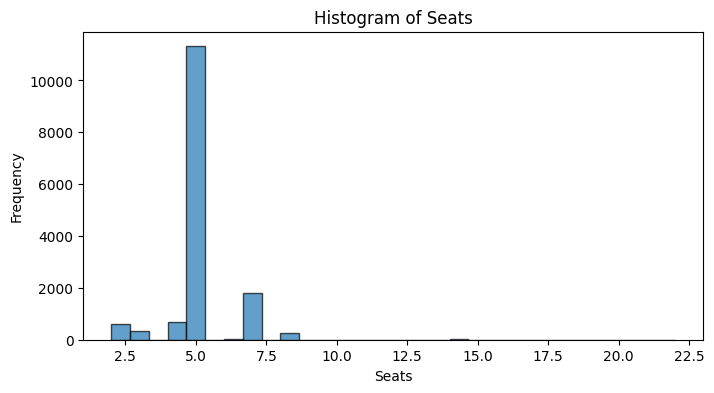

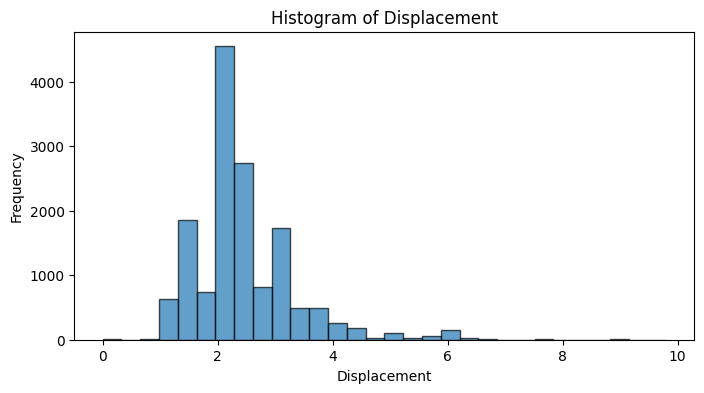

In [20]:
#Check histogram plots to understand the features.
columns_to_fill = ['FuelConsumption', 'CylindersinEngine', 'Doors', 'Seats', 'Displacement']
for column in columns_to_fill:
    if column in data.columns:
        plt.figure(figsize=(8, 4))
        plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

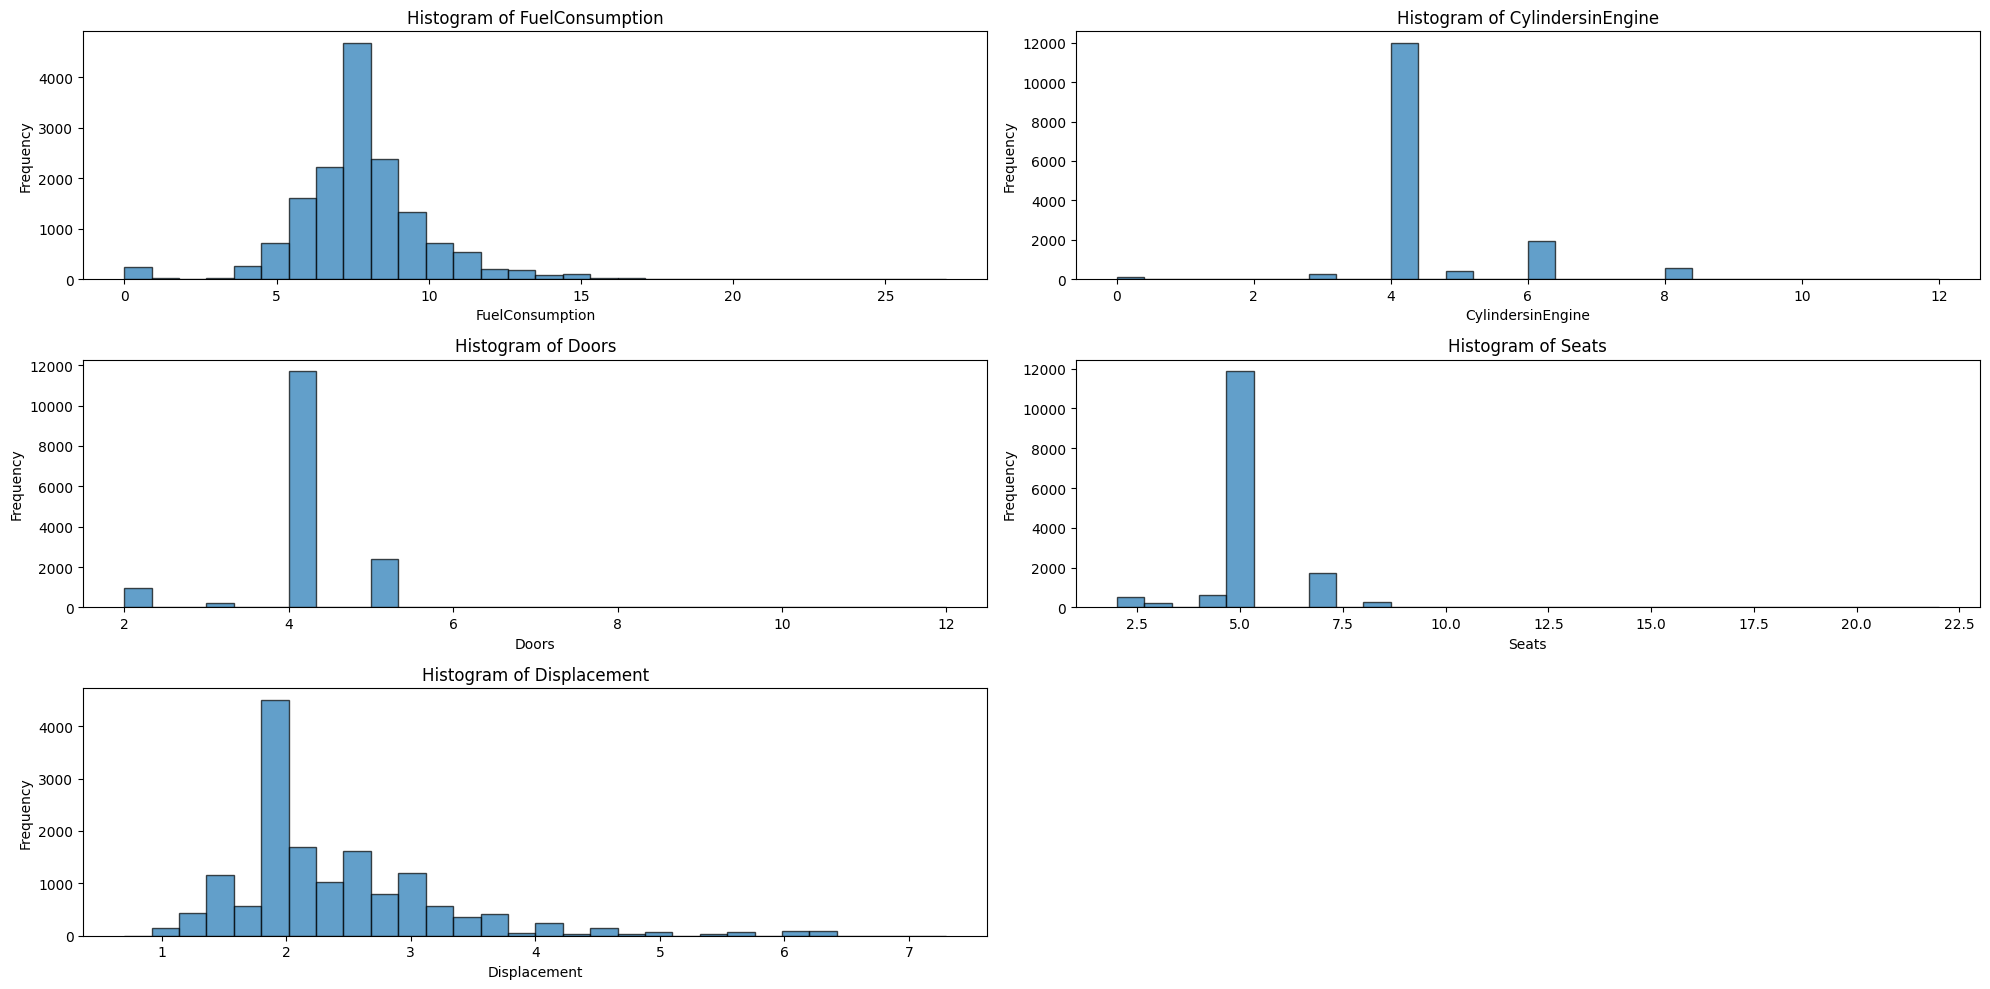

In [172]:
columns_to_fill = ['FuelConsumption', 'CylindersinEngine', 'Doors', 'Seats', 'Displacement']
num_columns = len(columns_to_fill) # to fit the plots in the screen
plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_fill, 1):
    if column in data.columns:
        plt.subplot(3, 2, i)
        plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
data[columns_to_fill].describe()

,FuelConsumption,CylindersinEngine,Doors,Seats,Displacement
count,15036.000000,15059.000000,15130.000000,15029.000000,14951.000000
mean,7.663661,4.423601,4.011500,5.101404,2.420373
std,2.324609,1.120655,0.713412,1.119178,0.903849
min,0.000000,0.000000,2.000000,2.000000,0.000000
25%,6.500000,4.000000,4.000000,5.000000,2.000000
50%,7.600000,4.000000,4.000000,5.000000,2.200000
75%,8.800000,4.000000,4.000000,5.000000,2.800000
max,27.000000,12.000000,12.000000,22.000000,9.800000


In [22]:
data[columns_to_fill].mode()

,FuelConsumption,CylindersinEngine,Doors,Seats,Displacement
0,7.4,4.0,4.0,5.0,2.0


As variables 'CylindersinEngine', 'Doors' and 'Seats' are discrete, I will replace the Nan values with the mode. 
For Displacement I will replace them with the median and fuel Consumption with the mean.

In [24]:
if 'FuelConsumption' in data.columns:
    data['FuelConsumption'].fillna(data['FuelConsumption'].mean(), inplace=True)

if 'CylindersinEngine' in data.columns:
    data['CylindersinEngine'].fillna(data['CylindersinEngine'].mode()[0], inplace=True)

if 'Doors' in data.columns:
    data['Doors'].fillna(data['Doors'].mode()[0], inplace=True)

if 'Seats' in data.columns:
    data['Seats'].fillna(data['Seats'].mode()[0], inplace=True)

if 'Displacement' in data.columns:
    data['Displacement'].fillna(data['Displacement'].median(), inplace=True)

In [25]:
print("Data shape:", data.shape)
print("Percentage of data missing from each column")
data.isnull().sum()/len(data)*100

Data shape: (16734, 15)
Percentage of data missing from each column


Brand                0.005976
Year                 0.005976
UsedOrNew            0.005976
Transmission         1.505916
DriveType            0.005976
FuelType             3.812597
FuelConsumption      0.000000
Kilometres           3.537708
Location             2.689136
CylindersinEngine    0.000000
BodyType             1.685192
Doors                0.000000
Seats                0.000000
Price                0.316720
Displacement         0.000000
dtype: float64

Then, as all of the other features have less than 5% of the rows missing I will drop them.

In [27]:
data.dropna(inplace=True)
print("Data shape after processing the missing value:", data.shape)

Data shape after processing the missing value: (15306, 15)


## Visualisation

We would like to perform some visualisation. The following cells are rendering some figures for the analysis.

#### *There is no feature that tells the origin of the car, and some of them are not from Germany. Also the plot should say number of car sold by location.* 

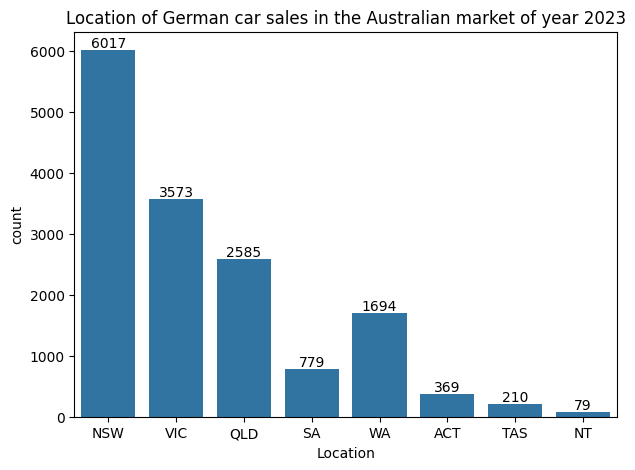

In [30]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data, x='Location')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Location of German car sales in the Australian market of year 2023')
plt.show()

We can see most of the cars were selling in NSW back in 2023, which aligns with the population distribution of Australia. [[Source]](https://www.worldatlas.com/articles/the-largest-states-and-territories-of-australia.html)

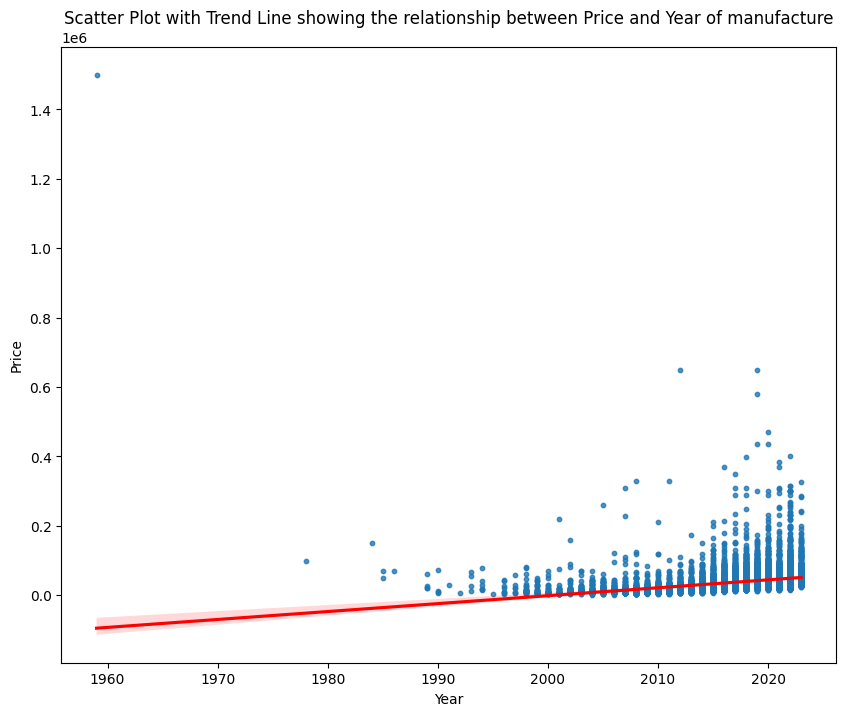

In [32]:
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Year', y='Price', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Scatter Plot with Trend Line showing the relationship between Price and Year of manufacture')
plt.show()

We can see the trends of the rising price accompanied with the newer  manufacturing year.

This also aligns with our common sense, *i.e.* the newer the car the higher the price.

## Encoding

We encode the categorical features to integers with OrdinalEncoder and drop the original column for simplicity.

#### *Error 2: he should not use ordinal encoder because the features dont have a natural order. The correct way to do it will be with one hot enconding, this is helpful for binary features also.

In [36]:
ord_enc = OrdinalEncoder(dtype=int)

data["BrandCode"] = ord_enc.fit_transform(data[["Brand"]])
data["UsedCode"] = ord_enc.fit_transform(data[["UsedOrNew"]])
data["TransmissionCode"] = ord_enc.fit_transform(data[["Transmission"]])
data["DriveTypeCode"] = ord_enc.fit_transform(data[["DriveType"]])
data["FuelTypeCode"] = ord_enc.fit_transform(data[["FuelType"]])
data["LocationCode"] = ord_enc.fit_transform(data[["Location"]])
data["BodyTypeCode"] = ord_enc.fit_transform(data[["BodyType"]])

In [37]:
# Drop the categorical columns
clean = data.drop(
    columns=['Brand', 'UsedOrNew', 'Transmission', 'DriveType',
             'FuelType', 'Location', 'BodyType'])

the following should be the correct code

In [39]:
# from sklearn.preprocessing import OneHotEncoder
# # Define features to encode, drop one of the columns after encoding.
# categorical_columns = ['Brand', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'Location', 'BodyType']
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# encoded_features = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# #concat to original dataframe and drop original columns
# data = pd.concat([data.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
# data.drop(columns=categorical_columns, inplace=True)



In [40]:
# clean=data # rename 

Now this ```clean``` will be used for following tasks. We check the shape and statistic info.

In [42]:
print(clean.shape)
clean.describe(include="all")

(15306, 15)


,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Displacement,BrandCode,UsedCode,TransmissionCode,DriveTypeCode,FuelTypeCode,LocationCode,BodyTypeCode
count,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,1.530600e+04,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000
mean,2016.025676,7.741051,101290.290017,4.400301,4.025023,5.114269,3.507147e+04,2.400510,40.285117,1.909251,0.117340,1.729126,4.427414,3.357638,5.814583
std,4.993409,2.137879,78140.256535,1.072308,0.670926,1.055690,3.185882e+04,0.838059,17.740585,0.373663,0.321835,1.229310,3.110382,2.375832,2.116283
min,1959.000000,0.000000,1.000000,0.000000,2.000000,2.000000,8.800000e+01,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,6.700000,42852.250000,4.000000,4.000000,5.000000,1.895000e+04,2.000000,27.000000,2.000000,0.000000,1.000000,0.000000,1.000000,6.000000
50%,2017.000000,7.663661,86690.500000,4.000000,4.000000,5.000000,2.895000e+04,2.200000,41.000000,2.000000,0.000000,2.000000,6.000000,3.000000,6.000000
75%,2020.000000,8.700000,147681.750000,4.000000,4.000000,5.000000,4.199900e+04,2.800000,59.000000,2.000000,0.000000,2.000000,7.000000,6.000000,7.000000
max,2023.000000,27.000000,533849.000000,12.000000,12.000000,22.000000,1.500000e+06,7.300000,65.000000,2.000000,1.000000,4.000000,7.000000,7.000000,9.000000


We also plot the feature distribution to observe the value distribution of each feature.

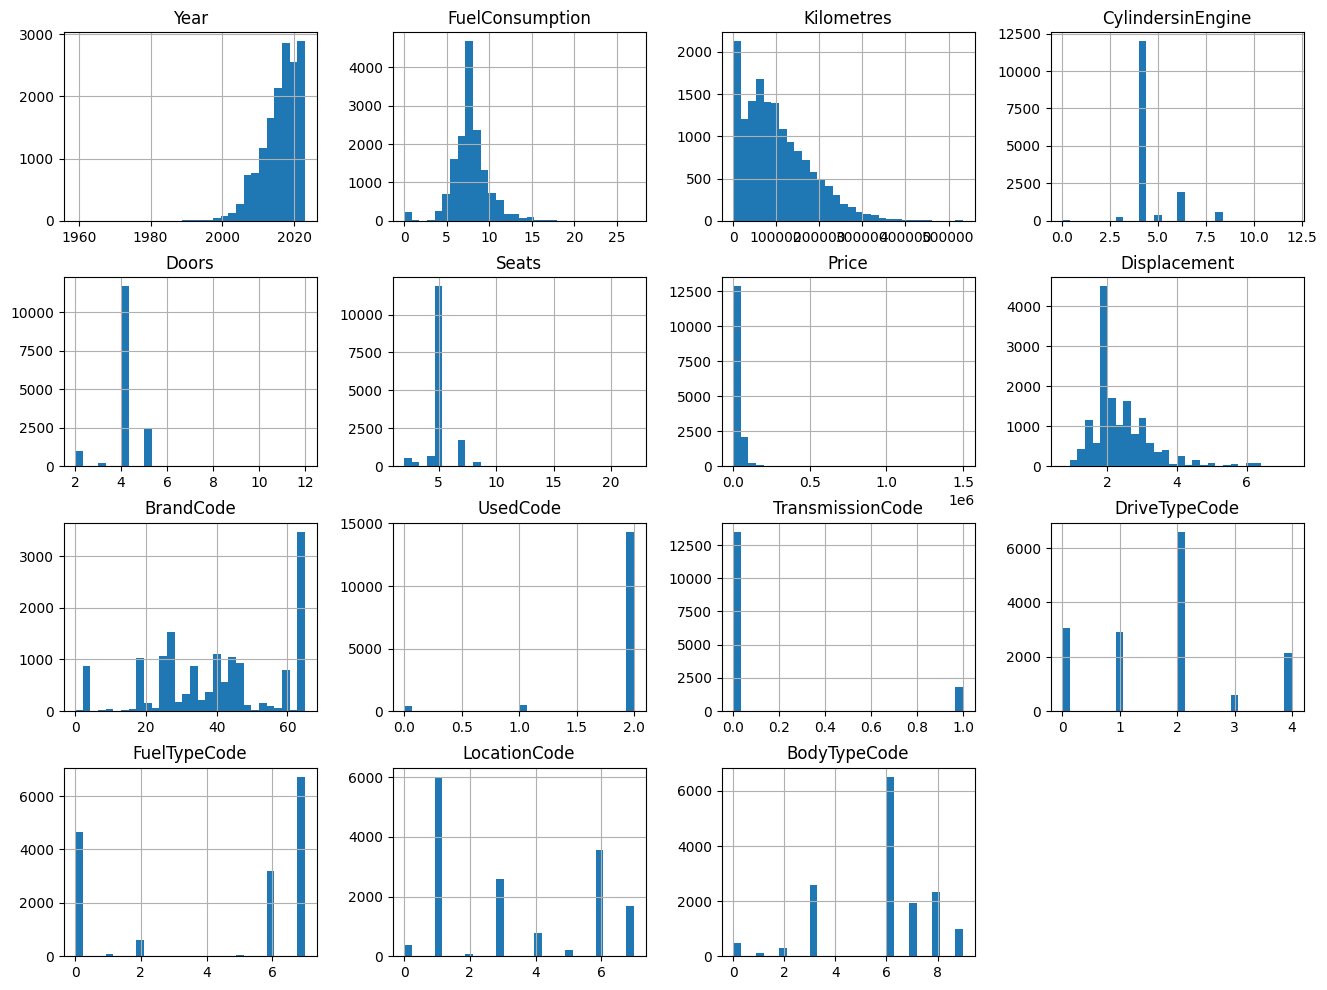

In [44]:
clean.hist(bins=30 ,figsize=(16,12))
plt.show()

## Feature Selection & Data Splitting

We first study the correlation between the price and other features.

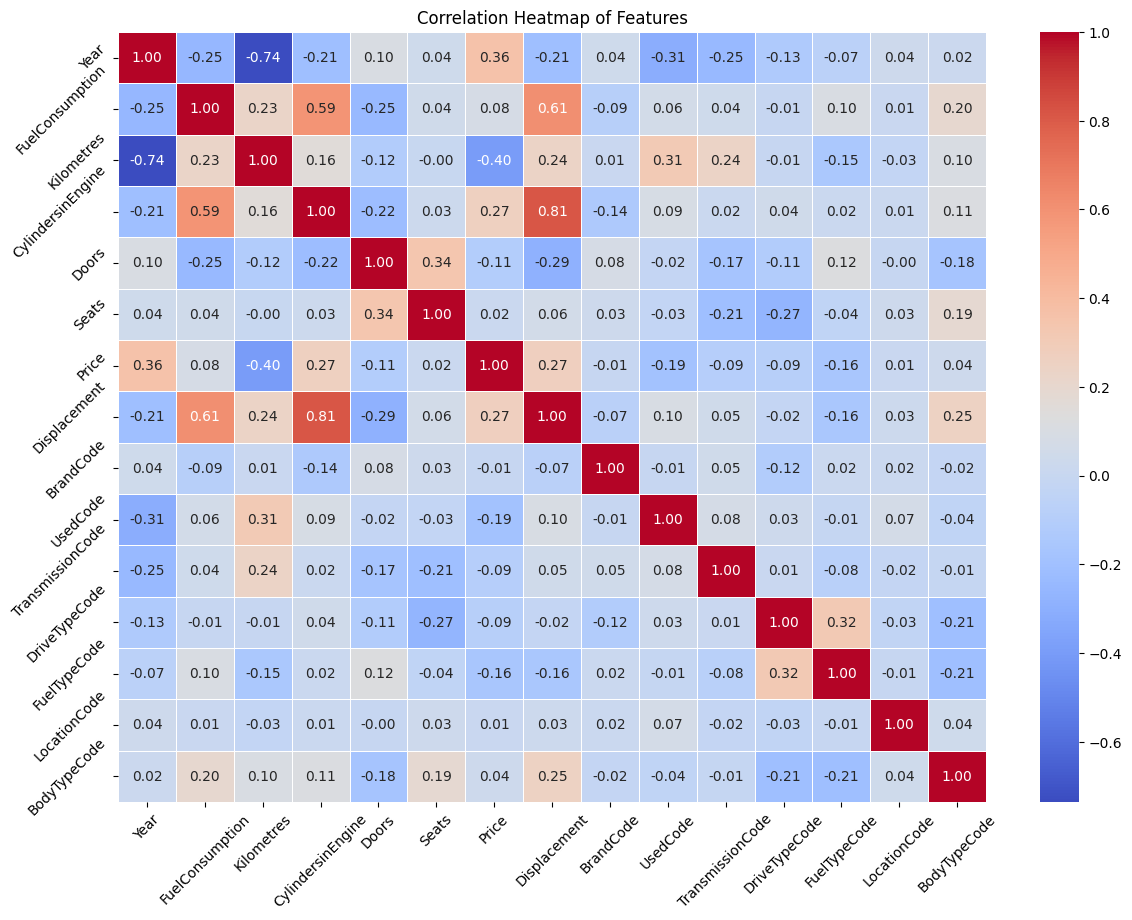

In [47]:
plt.figure(figsize=(14, 10))
sns.heatmap(clean.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Then we keep the 5-top most correlated features and split the dataset. We want the training set the size of 80% of full dataset.

In [49]:
# to better see the most correlated features
correlation_matrix = clean.corr()

# Get the correlation of each feature with 'SalePrice', sorted in descending order
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)

correlation_with_price

Price                1.000000
Year                 0.358114
Displacement         0.272787
CylindersinEngine    0.266290
FuelConsumption      0.078518
BodyTypeCode         0.035934
Seats                0.016764
LocationCode         0.005180
BrandCode           -0.010196
DriveTypeCode       -0.088390
TransmissionCode    -0.091792
Doors               -0.111520
FuelTypeCode        -0.162331
UsedCode            -0.189065
Kilometres          -0.400549
Name: Price, dtype: float64

#### Error 3: FuelConsumption is not in the top 5 most correlated features, UsedCode should replace it.

In [51]:
# X = clean[['Kilometres','Year','Displacement','CylindersinEngine','FuelConsumption']]
# y = clean['Price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

In [52]:
X = clean[['Kilometres','Year','Displacement','CylindersinEngine','UsedCode']]
y = clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

## Model Training & Evaluating

We then train and evaluate several models.

### Linear Regression (LR)

We perform linear regression to check the performance.
As overfitiing and underftiitng will both decrease the model performance, we would like to avoid them.

In [55]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
# # evaluate testing set
# y_pred = regressor.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print("The results for testing set with LR:")
# print("MSE:", mse)
# print("Root MSE:", rmse)
# print("R^2:", r2)

#### Error 4: *he talks about overfitting and underfitting, but is not checking them, is only running the model with the test data, we should train it with the training set and then with the testing set check if there is under or over fitting. I will add the code.*

In [58]:
# Evaluate on training set
y_train_pred = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate testing set
y_test_pred = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print("MSE:", mse_train)
print("R^2:", r2_train)

print("\nTesting Set Performance:")
print("MSE:", mse_test)
print("R^2:", r2_test)




Training Set Performance:
MSE: 708863105.829303
R^2: 0.30916930541424825

Testing Set Performance:
MSE: 585812382.7236781
R^2: 0.39606881900920077


Then, he could say that there is no overfitting as the MSE do not change radically between train and test sets.
but we can see underfitting as the r^2 is low for both sets.

### Decision Tree Regression (DTR)

We perform decision tree regression to check the performance. We want to tune the model so that it's not overfitting nor underfitting.

In [177]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [179]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with DTR:
MSE: 799556388.199268
Root MSE: 28276.428137218252
R^2: 0.17571384963077818


In [181]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for training set with DTR:
MSE: 714568584.2193911
Root MSE: 26731.41567929748
R^2: 0.3036089658130535


#### Error 5: He says that he wants to tune it to avoid under or overfitting, and there is no code for that. He should find a better value for the max_depth hyperparameter to avoid under or overfitting. I coded the best parameter search for this model to tune it. Also he says the model is overfitting, but the R^2 is low.

In [66]:
# re define regressor for different max_depth
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10]} #parameters to check
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_dtr = grid_search.best_estimator_

# evaluate the model for both training and test sets.
y_pred_dtr_train = best_dtr.predict(X_train)
y_pred_dtr_test = best_dtr.predict(X_test)

# aalculate metrics for training and testing sets to check for underfitting or overfitting
mse_dtr_train = mean_squared_error(y_train, y_pred_dtr_train)
mse_dtr_test = mean_squared_error(y_test, y_pred_dtr_test)
r2_dtr_train = r2_score(y_train, y_pred_dtr_train)
r2_dtr_test = r2_score(y_test, y_pred_dtr_test)

print("Decision Tree Regressor Results (best max_depth={}):".format(best_dtr.max_depth))
print("Training MSE:", mse_dtr_train)
print("Testing MSE:", mse_dtr_test)
print("Training R^2:", r2_dtr_train)
print("Testing R^2:", r2_dtr_test)


Decision Tree Regressor Results (best max_depth=6):
Training MSE: 322672071.896094
Testing MSE: 480490591.15093565
Training R^2: 0.68553622029656
Testing R^2: 0.5046481455042435


With this code, I tuned the model to avoid underfitting and also checked for overfitting. As the R^2 increased, there is no underfitting, and since the training result is not excessively high, the model is not overfitting.

### Multi-Layer Perceptron (MLP)

We then deploy a MLP regressior and try to capture the inner non-linear relationship.

We would like a double hidden-layer structure with 100 and 100 for each layer respectively.

To save the calculation time, we would like to set the max_iteration as 1000.

In [69]:
regressor = MLPRegressor(
    solver='adam',
    activation='identity',
    alpha=0.0001,
    random_state=student_id,
    hidden_layer_sizes=(100,100),
    max_iter=1000
)

regressor.fit(X_train, y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(100, 100),
             max_iter=1000, random_state=40987654)

#### Error 6: He says we wants to capture the non-linear relationship, but with activation='identity' the model wont do it, as it is simmilar to a linear regression. I just changed the activation to 'relu'

In [70]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with MLP:
MSE: 782532965.2477101
Root MSE: 27973.790684276417
R^2: 0.19326379604850308


In [71]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for training set with MLP:
MSE: 868738207.4445981
Root MSE: 29474.365259401227
R^2: 0.15336118592317982


In [74]:
regressor = MLPRegressor(
    solver='adam',
    activation='relu',
    alpha=0.0001,
    random_state=student_id,
    hidden_layer_sizes=(100,100),
    max_iter=1000
)

regressor.fit(X_train, y_train)
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with MLP:
MSE: 547180863.8972353
Root MSE: 23391.8973983992
R^2: 0.43589518573748276
The results for training set with MLP:
MSE: 649424658.2296551
Root MSE: 25483.81168957374
R^2: 0.36709572830562587


As the performance of training set and testing set are similar, we can say it is not overfitting.

## Analysis

According to the result we have, among these three models (LR, DTR and MLP) the best option for this dataset is DTR. However, the releationships among the features within this dataset are not obvious for these models to catch, thus all the performance are not very satisfying. We might need to further clean the data (*e.g.* remove outliers) or deploy deep learning models for the prediction.